In [43]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tensorflow import keras 
import tensorflow as tf

# Dataset Loading

In [44]:
train_data_path=r"F:\BD MSc\Jahangirnagar MSc\MSc Research\Leaf Disease\Corn Leaves Diseases Detection\Implementation\data\Train"
test_data_path=r"F:\BD MSc\Jahangirnagar MSc\MSc Research\Leaf Disease\Corn Leaves Diseases Detection\Implementation\Augmented Data"

# Train & Test Data Separation

In [45]:
CATEGORIES=["Blight","Common_Rust","Gray_Leaf_Spot","Eyespot","Healthy"]

In [46]:
train_data=[] #List of the data for training

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(train_data_path,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])

In [47]:
test_data=[] #List of the data for test
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(test_data_path,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

In [48]:
print(len(train_data))
print(len(test_data))

4374
4692


In [49]:
import random
random.shuffle(train_data)
random.shuffle(test_data)

# Test Train Split

In [50]:
X_train=[]
y_train=[]

In [51]:
for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [52]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("Blight")
    elif i==1:
        Y.append("Common_Rust")
    elif i==2:
        Y.append("Gray_Leaf_Spot")
    elif i==3:
        Y.append("Eyespot")
    else:
        Y.append("Healthy")
    

len(X_train),len(y_train)

(4374, 4374)

In [53]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("Blight")
    elif i==1:
        Z.append("Common_Rust")
    elif i==2:
        Z.append("Gray_Leaf_Spot")
    elif i==3:
        Z.append("Eyespot")
    else:
        Z.append("Healthy")

len(X_test),len(y_test)

(4692, 4692)

# Reshaping Test&Train Data

In [54]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(4374, 64, 64, 3)

In [55]:
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(4692, 64, 64, 3)

# Data Visualization

In [56]:
order=["Blight","Common_Rust","Gray_Leaf_Spot","Eyespot","Healthy"]

Text(0, 0.5, 'Image Count')

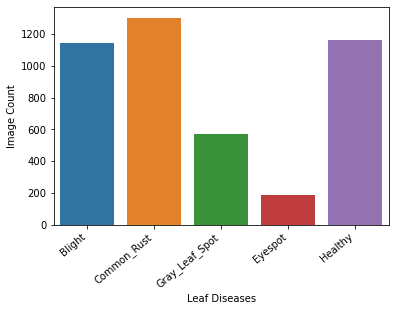

In [58]:
ax=sns.countplot(Y, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

Text(0, 0.5, 'Image Count')

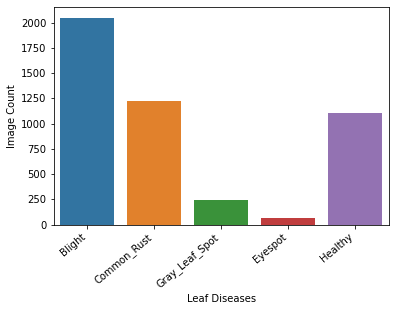

In [59]:
ax=sns.countplot(Z, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

# Converting dataset labels vector to categorical data matrix

In [60]:
from tensorflow.keras.utils import to_categorical

one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

# Building Convolutional Neural Network

In [61]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

In [62]:
classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=5))

In [63]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 128)      

In [65]:
hist=classifier.fit(X_train,one_hot_train,epochs=15,batch_size=128,validation_split=0.2)

Epoch 1/15
28/28 [==============================] - 110s 4s/step - loss: 1.3977 - accuracy: 0.3667 - val_loss: 1.1649 - val_accuracy: 0.4686
Epoch 2/15
28/28 [==============================] - 25s 905ms/step - loss: 0.7500 - accuracy: 0.7085 - val_loss: 0.7185 - val_accuracy: 0.7006
Epoch 3/15
28/28 [==============================] - 25s 910ms/step - loss: 0.5515 - accuracy: 0.7788 - val_loss: 0.4957 - val_accuracy: 0.8171
Epoch 4/15
28/28 [==============================] - 25s 881ms/step - loss: 0.5060 - accuracy: 0.7891 - val_loss: 0.5095 - val_accuracy: 0.8069
Epoch 5/15
28/28 [==============================] - 24s 866ms/step - loss: 0.4335 - accuracy: 0.8202 - val_loss: 0.4552 - val_accuracy: 0.8103
Epoch 6/15
28/28 [==============================] - 24s 841ms/step - loss: 0.4032 - accuracy: 0.8328 - val_loss: 0.3984 - val_accuracy: 0.8354
Epoch 7/15
28/28 [==============================] - 25s 885ms/step - loss: 0.3792 - accuracy: 0.8417 - val_loss: 0.3761 - val_accuracy: 0.8491
E

# Test Loss and Accuracy

In [66]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

147/147 [==============================] - 9s 59ms/step - loss: 0.3077 - accuracy: 0.8919


(0.3076852858066559, 0.8919437527656555)

# Learning Curve

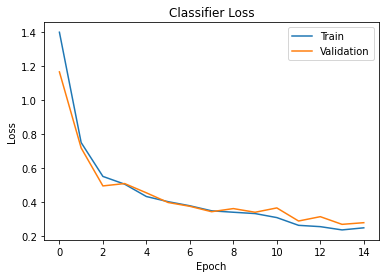

In [67]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

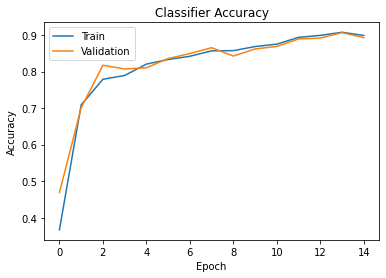

In [68]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [69]:
y_pred=classifier.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([4, 1, 0, ..., 2, 3, 1], dtype=int64)

In [70]:
y_prob=classifier.predict_proba(X_test)
y_prob

Instructions for updating:
Please use `model.predict()` instead.


array([[7.14589730e-02, 1.32831438e-02, 1.68397278e-02, 2.53803632e-03,
        8.95880163e-01],
       [4.90916520e-03, 9.94989574e-01, 6.32113370e-06, 9.29076923e-05,
        2.14401825e-06],
       [5.57092130e-01, 2.89514810e-01, 1.42655328e-01, 9.74468049e-03,
        9.93023161e-04],
       ...,
       [4.94367853e-02, 3.40145919e-03, 9.46799099e-01, 1.04769315e-04,
        2.57955893e-04],
       [3.55624594e-02, 2.08594203e-02, 8.49915482e-03, 9.34541285e-01,
        5.37610264e-04],
       [3.16701306e-04, 9.99677658e-01, 2.77005529e-06, 2.06049231e-06,
        8.46333535e-07]], dtype=float32)

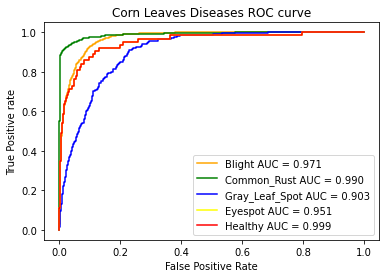

In [71]:
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
      
plt.plot(fpr[0], tpr[0], color='orange',label='Blight AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',label='Common_Rust AUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',label='Gray_Leaf_Spot AUC = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='yellow',label='Eyespot AUC = %0.3f' % roc_auc[3])
plt.plot(fpr[3], tpr[3], color='red',label='Healthy AUC = %0.3f' % roc_auc[4])
 
plt.title('Corn Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

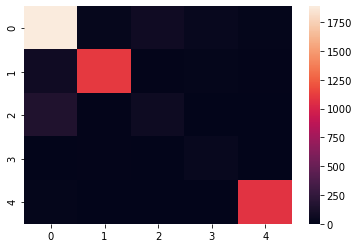

In [72]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)